In [1]:
import pickle

# from deepsnap.hetero_graph import HeteroGraph
import numpy as np
# import pandas as pd
# 
from matplotlib import pyplot as plt

In [2]:
graph = pickle.load(open('../data/graphs/10_concepts_similar_llm_noFuture.pkl', 'rb'))

In [3]:
counts = []
# count the number of events with degree 0 in the nx graph
zero_degree_count = 0
for i, data in graph.nodes(data=True):
    if data['node_type'] == 'event':
        counts.append(data['node_target'])
        if graph.degree(i) == 0:
            zero_degree_count += 1

counts = np.array(counts)

In [4]:
nonzero_counts = counts[counts != -1]

In [5]:
print(f"Total events: {len(counts)}")
print(f"Total events with positive targets: {len(nonzero_counts)}")
print(f"Total events without edges: {zero_degree_count} ({zero_degree_count / len(counts) * 100:.2f}%)")

Total events: 79095
Total events with positive targets: 7241


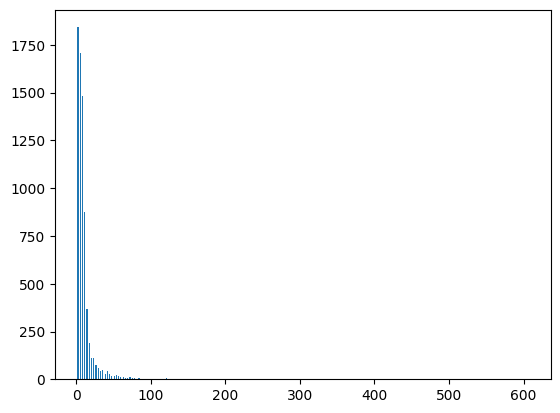

In [6]:
plt.hist(nonzero_counts, bins=200, rwidth=0.5)
plt.show()

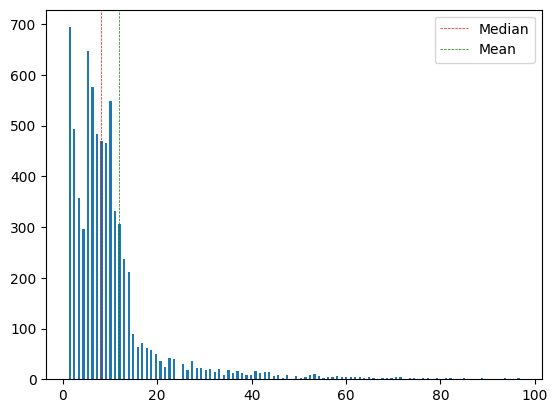

In [18]:
plt.hist(nonzero_counts[nonzero_counts < 100], bins=100, rwidth=0.5)
# draw the median line
plt.axvline(np.median(nonzero_counts), color='r', linestyle='dashed', linewidth=0.5)
# draw the mean line
plt.axvline(np.mean(nonzero_counts), color='g', linestyle='dashed', linewidth=0.5)

# add the legend
plt.legend({'Median': np.median(nonzero_counts), 'Mean': np.mean(nonzero_counts)})

plt.show()